In [0]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from google.colab import drive
import os

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW4')

          x0        x1
1  -6.912185  3.800000
2  -6.988086  4.000000
3  -9.922216 -4.982732
4  -8.956574 -4.414626
5  -7.976215 -3.982776
6  -6.905073 -3.465091
7  -5.905722 -2.906714
8  -4.941179 -1.909161
9  -4.242302 -1.438373
10 -3.453954 -0.965268
11  4.914562  2.819403
12  4.930183  2.115149
13  5.074050  2.876634
14  4.147040  2.563205
15  0.125050 -1.803508
16  0.102808 -1.997527
17  5.000000 -3.000000
18  0.000000  5.001018
19  3.005828  5.007149


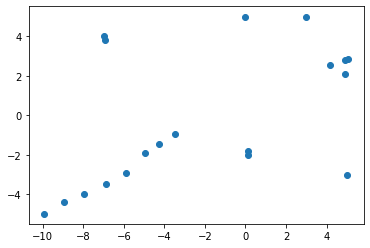

In [2]:
c1 = pd.read_csv("C1.txt", delim_whitespace=True, names=['x0', 'x1'])
print (c1)
plt.scatter(c1['x0'],c1['x1'])

In [14]:
#trying to understand algo
  clusters=[]
  for index, row in c1[:6].iterrows():
    clusters.append([[row['x0'], row['x1']]])
  print(clusters)
  while len(clusters) > 4: #stop when we have 4 clusters
    closest_distance=clust_1=clust_2 = math.inf
    for cluster_id, cluster in enumerate(clusters): # loop through each clusters
      print ('new cluster loop')
      for cluster2_id, cluster2 in enumerate(clusters[cluster_id+1:]):
        furthest_cluster_dist = -1
        for point_id, point in enumerate(cluster):
          print('point_id',point_id, point,'%%%%%')
          for point2_id, point2 in enumerate(cluster2):
            print('point2_id',point2_id, point2)
            print(furthest_cluster_dist, distance.euclidean(point, point2),furthest_cluster_dist < distance.euclidean(point, point2))
            if furthest_cluster_dist < distance.euclidean(point, point2):
              furthest_cluster_dist = distance.euclidean(point, point2)
        print(furthest_cluster_dist,closest_distance, furthest_cluster_dist < closest_distance)
        if furthest_cluster_dist < closest_distance:
          closest_distance = furthest_cluster_dist
          clust_1 = cluster_id
          clust_2 = cluster2_id+cluster_id+1
          print(clust_1)
          print(clust_2)         
            
    clusters[clust_1].extend(clusters[clust_2])   
    print('end of loop',clusters)      
    clusters.pop(clust_2)
    print('end of loop pop',clusters) 
    print('length of cluster',len(clusters))

[[[-6.912185242808558, 3.8]], [[-6.988086178040582, 4.0]], [[-9.922216335879318, -4.9827324347530135]], [[-8.956573548749036, -4.414625505242606]], [[-7.976214885543187, -3.9827760757713566]], [[-6.90507327520688, -3.465091182283795]]]
new cluster loop
point_id 0 [-6.912185242808558, 3.8] %%%%%
point2_id 0 [-6.988086178040582, 4.0]
-1 0.21391809640396484 True
0.21391809640396484 inf True
0
1
point_id 0 [-6.912185242808558, 3.8] %%%%%
point2_id 0 [-9.922216335879318, -4.9827324347530135]
-1 9.284216509846987 True
9.284216509846987 0.21391809640396484 False
point_id 0 [-6.912185242808558, 3.8] %%%%%
point2_id 0 [-8.956573548749036, -4.414625505242606]
-1 8.465199096113954 True
8.465199096113954 0.21391809640396484 False
point_id 0 [-6.912185242808558, 3.8] %%%%%
point2_id 0 [-7.976214885543187, -3.9827760757713566]
-1 7.855174251804792 True
7.855174251804792 0.21391809640396484 False
point_id 0 [-6.912185242808558, 3.8] %%%%%
point2_id 0 [-6.90507327520688, -3.465091182283795]
-1 7.26509

first cluster |  second cluster |  distance
10  |  12  |  0.16944488242854633
first cluster |  second cluster |  distance
13  |  14  |  0.19528929532997621
first cluster |  second cluster |  distance
0  |  1  |  0.21391809640396484
first cluster |  second cluster |  distance
9  |  10  |  0.774955686868893
first cluster |  second cluster |  distance
6  |  7  |  0.8426573444474812
first cluster |  second cluster |  distance
8  |  9  |  0.9785629383103536
first cluster |  second cluster |  distance
2  |  3  |  1.0712595569036494
first cluster |  second cluster |  distance
3  |  4  |  1.1447658914304835
first cluster |  second cluster |  distance
4  |  5  |  1.7614691339807294
first cluster |  second cluster |  distance
1  |  2  |  2.187883535423716
first cluster |  second cluster |  distance
7  |  8  |  3.0058339424054465
first cluster |  second cluster |  distance
2  |  3  |  4.261377574286882
first cluster |  second cluster |  distance
4  |  5  |  5.019634753076082
first cluster |  seco

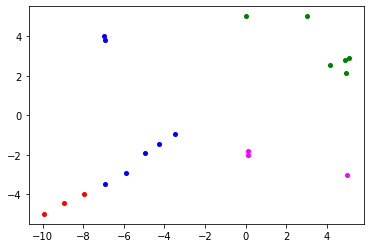

In [33]:
  clusters=[]
  for index, row in c1.iterrows():
    clusters.append([[row['x0'], row['x1']]])
  while len(clusters) > 4: #stop when we have 4 clusters
    closest_distance=clust_1=clust_2 = math.inf
    for cluster_id, cluster in enumerate(clusters): # loop through each clusters
      for cluster2_id, cluster2 in enumerate(clusters[cluster_id+1:]):
        furthest_cluster_dist = -1
        for point_id, point in enumerate(cluster):
          for point2_id, point2 in enumerate(cluster2):
            if furthest_cluster_dist < distance.euclidean(point, point2):
              furthest_cluster_dist = distance.euclidean(point, point2)
        if furthest_cluster_dist < closest_distance:
          closest_distance = furthest_cluster_dist
          clust_1 = cluster_id
          clust_2 = cluster2_id+cluster_id+1               
    print('first cluster | ','second cluster | ', 'distance')          
    print(clust_1,' | ',clust_2, ' | ',closest_distance)         
    clusters[clust_1].extend(clusters[clust_2])         
    clusters.pop(clust_2)
  
  for i in clusters:
    print(np.around(i,2))
  
  colors = ['blue', 'red', 'green', 'magenta']
  for cluster_index, cluster in enumerate(clusters):
      for point_index, point in enumerate(cluster):
          plt.plot([point[0]], [point[1]], marker='o', markersize=4, color=colors[cluster_index])

In [34]:
X = c1.as_matrix()
# generate the linkage matrix
complete_link = linkage(X, 'complete') # using single link metric to evaluate 'distance' between clusters
c, coph_dists = cophenet(complete_link, pdist(X))
print(c)
print(complete_link)

0.8038851442892406
[[10.         12.          0.16944488  2.        ]
 [14.         15.          0.1952893   2.        ]
 [ 0.          1.          0.2139181   2.        ]
 [11.         19.          0.77495569  3.        ]
 [ 7.          8.          0.84265734  2.        ]
 [13.         22.          0.97856294  4.        ]
 [ 3.          4.          1.07125956  2.        ]
 [ 5.          6.          1.14476589  2.        ]
 [ 9.         23.          1.76146913  3.        ]
 [ 2.         25.          2.18788354  3.        ]
 [17.         18.          3.00583394  2.        ]
 [26.         27.          4.26137757  5.        ]
 [16.         20.          5.01963475  3.        ]
 [24.         29.          5.71270055  6.        ]
 [21.         30.          7.46555273  7.        ]
 [31.         32.          9.4348444   9.        ]
 [28.         33.          9.44979374 10.        ]
 [34.         35.         16.93096663 19.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


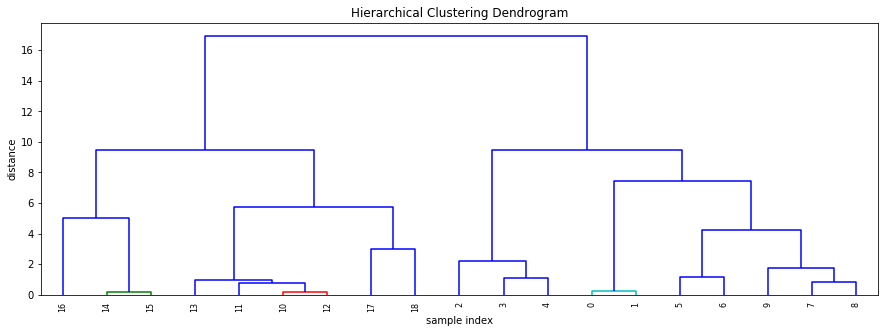

In [19]:
# calculate full dendrogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    complete_link,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold= .6
)
plt.show()